# Heart Disease Classification Pipeline

In [9]:
import pandas as pd
import numpy as np

In [10]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.Collecting scikit-learn
  Using cached scikit_learn-1.5.2-cp313-cp313-win_amd64.whl.metadata (13 kB)
  Using cached scipy-1.14.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp313-cp313-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp313-cp313-win_amd64.whl (44.5 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
%pip install joblib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import joblib

In [15]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Collecting matplotlib
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   --------- ------------------------------ 1.8/7.8 MB 5.3 MB/s eta 0:00:02
   ---------------- ----------------------- 3.1/7.8 MB 5.9 MB/s eta 0:00:01
   ---------------- ----------------------- 3.1/7.8 MB 5.9 MB/s eta 0:00:01
   -------------------------------- ------- 6.3/7.8 MB 6.2 MB/s eta 0:00:01
   -------------------------------------- - 7.6/7.8 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 6.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 5.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   -------------------- -----


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import matplotlib.pyplot as plt

In [17]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import seaborn as sns

# Load and Examine Data

In [63]:
# Load the dataset
df = pd.read_csv('UCI_Heart_Disease_Dataset_Combined.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nAll rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (2943, 11)

All rows:
   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           0   
1   49    0              2        160          180          0           0   
2   37    1              1        130          283          0           1   
3   48    0              3        138          214          0           0   
4   54    1              2        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  HeartDisease  
0    172               0      0.0             0  
1    156               0      1.0             1  
2     98               0      0.0             0  
3    108               1      1.5             1  
4    122               0      0.0             0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          ------------

# Define Heart Disease Model Class

In [64]:
class HeartDiseaseModel:
    def __init__(self):
        self.model = RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            random_state=42
        )
        self.scaler = StandardScaler()
        self.label_encoders = {}
        
    def preprocess_data(self, df):
        """
        Preprocess the input data by handling categorical variables and scaling numerical features.
        """
        # Create a copy to avoid modifying the original dataframe
        df_processed = df.copy()
        
        # Categorical columns that need encoding
        categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina']
        
        # Numerical columns that need scaling
        numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
        
        # Encode categorical variables
        for col in categorical_cols:
            if col not in self.label_encoders:
                self.label_encoders[col] = LabelEncoder()
            df_processed[col] = self.label_encoders[col].fit_transform(df_processed[col])
        
        # Scale numerical variables
        if not hasattr(self, 'scaler_fit'):
            self.scaler.fit(df_processed[numerical_cols])
            self.scaler_fit = True
        
        df_processed[numerical_cols] = self.scaler.transform(df_processed[numerical_cols])
        
        return df_processed
    
    def train(self, X_train, y_train):
        """Train the model using the preprocessed data."""
        self.model.fit(X_train, y_train)
    
    def predict(self, X):
        """Make predictions using the trained model."""
        return self.model.predict(X)
    
    def predict_proba(self, X):
        """Get probability predictions using the trained model."""
        return self.model.predict_proba(X)
    
    def evaluate(self, X_test, y_test):
        """Evaluate the model and return various metrics."""
        predictions = self.predict(X_test)
        
        metrics = {
            'accuracy': accuracy_score(y_test, predictions),
            'classification_report': classification_report(y_test, predictions),
            'confusion_matrix': confusion_matrix(y_test, predictions)
        }
        
        return metrics

# Define Visualization Methods

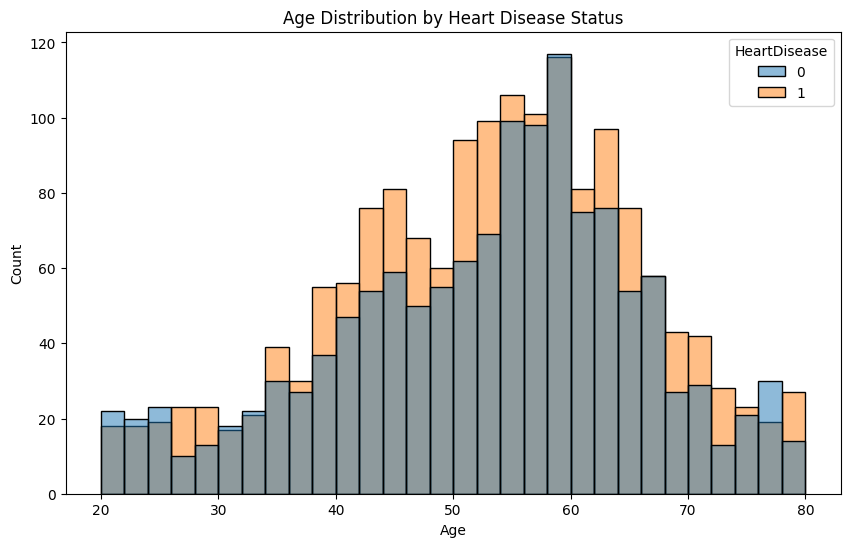

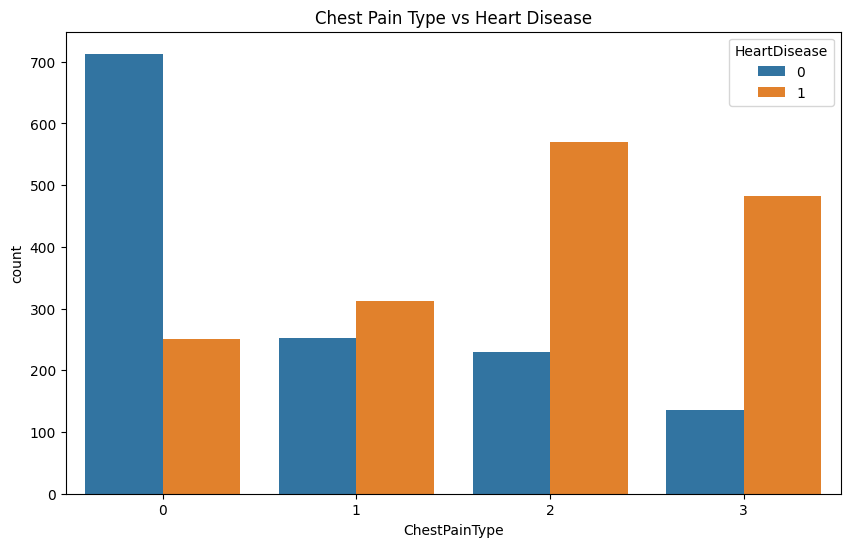

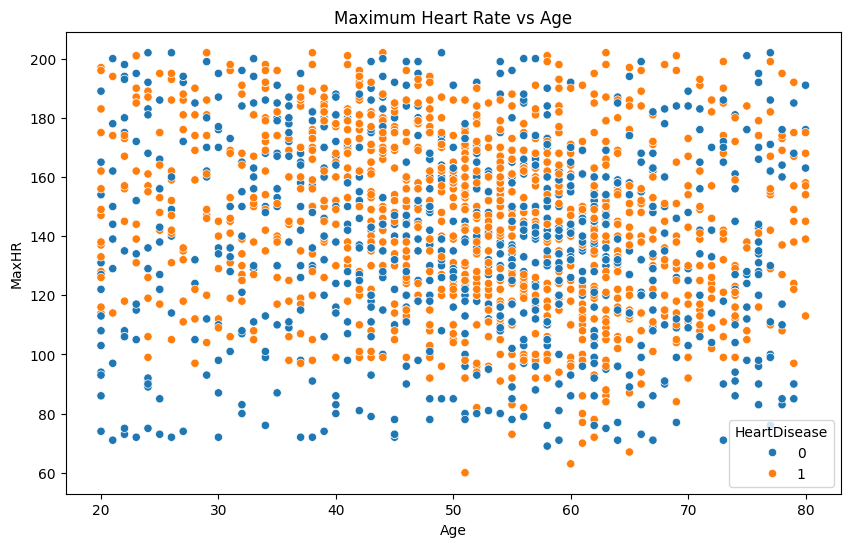

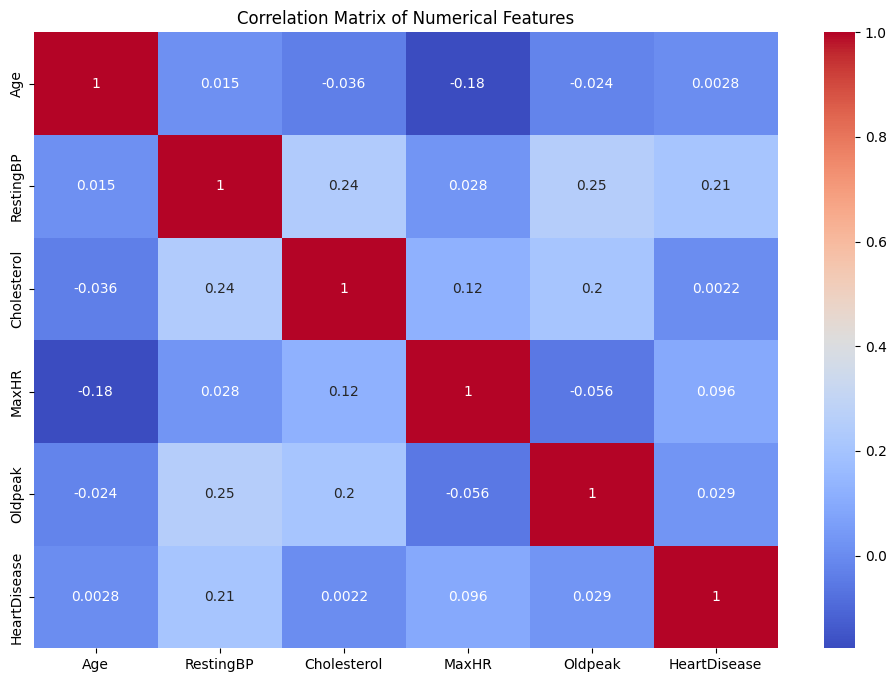

In [65]:
def create_visualizations(df):
    """Create and save important visualizations for the dataset."""
    # Create visualizations directory if it doesn't exist
    import os
    if not os.path.exists('visualizations'):
        os.makedirs('visualizations')
    
    # 1. Age Distribution by Heart Disease
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='Age', hue='HeartDisease', bins=30)
    plt.title('Age Distribution by Heart Disease Status')
    plt.savefig('visualizations/age_distribution.png')
    plt.show()
    
    # 2. Chest Pain Type Analysis
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='ChestPainType', hue='HeartDisease')
    plt.title('Chest Pain Type vs Heart Disease')
    plt.savefig('visualizations/chest_pain_analysis.png')
    plt.show()
    
    # 3. MaxHR vs Age with Heart Disease
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Age', y='MaxHR', hue='HeartDisease')
    plt.title('Maximum Heart Rate vs Age')
    plt.savefig('visualizations/maxhr_vs_age.png')
    plt.show()
    
    # 4. Correlation Matrix
    plt.figure(figsize=(12, 8))
    numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix of Numerical Features')
    plt.savefig('visualizations/correlation_matrix.png')
    plt.show()

# Create visualizations
create_visualizations(df)

# Train and Evaluate Model

In [66]:
# Create model instance
heart_model = HeartDiseaseModel()

# Preprocess data
df_processed = heart_model.preprocess_data(df)

# Split features and target
X = df_processed.drop('HeartDisease', axis=1)
y = df_processed['HeartDisease']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
heart_model.train(X_train, y_train)

# Evaluate model
metrics = heart_model.evaluate(X_test, y_test)

# Print metrics
print("Model Accuracy:", metrics['accuracy'])
print("\nClassification Report:")
print(metrics['classification_report'])

Model Accuracy: 0.8607809847198642

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.75      0.83       263
           1       0.82      0.95      0.88       326

    accuracy                           0.86       589
   macro avg       0.87      0.85      0.86       589
weighted avg       0.87      0.86      0.86       589



#  Save Model

In [67]:
# Create models directory if it doesn't exist
import os
if not os.path.exists('models'):
    os.makedirs('models')

# Save model
joblib.dump(heart_model, 'models/heart_disease_model.pkl')
print("Model saved successfully!")

Model saved successfully!
